In [ ]:
#abc

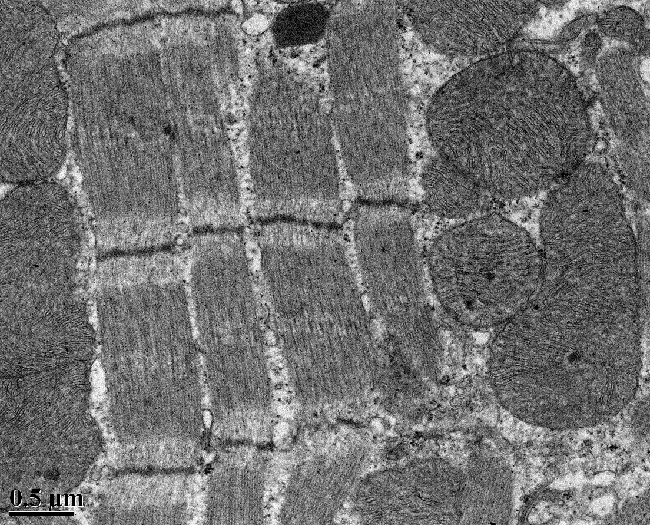

In [ ]:
import requests
from PIL import Image
import numpy as np
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

def url_to_float_array(image_url):
    # Download the image from the URL
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Normalize the pixel values to float between 0 and 1
    float_array = image_array.astype(np.float32) / 255.0

    return float_array

def display_image(image_array):
    # Convert the float array back to uint8 for display
    image_uint8 = (image_array * 255).astype(np.uint8)
    # OpenCV uses BGR format, so we need to convert RGB to BGR
    bgr_image = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2BGR)
    cv2_imshow(bgr_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage:
url = "https://www.ualberta.ca/biological-sciences/media-library/services/amf/transmission-electron-microscope-photos/muscle-fibers-mitochondria-tem.png"
image_float_array = url_to_float_array(url)
display_image(image_float_array)

In [ ]:
import numpy
from matplotlib import pyplot as plt

[[0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00531767 0.02815437 0.07653151 0.10680833 0.07653151 0.02815437
  0.00531767]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]]


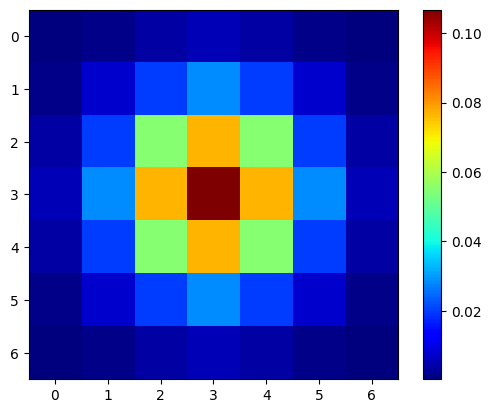

In [ ]:
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()


gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

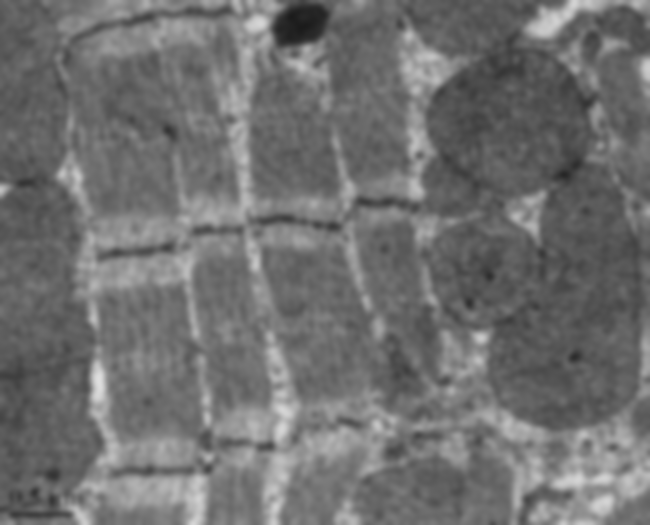

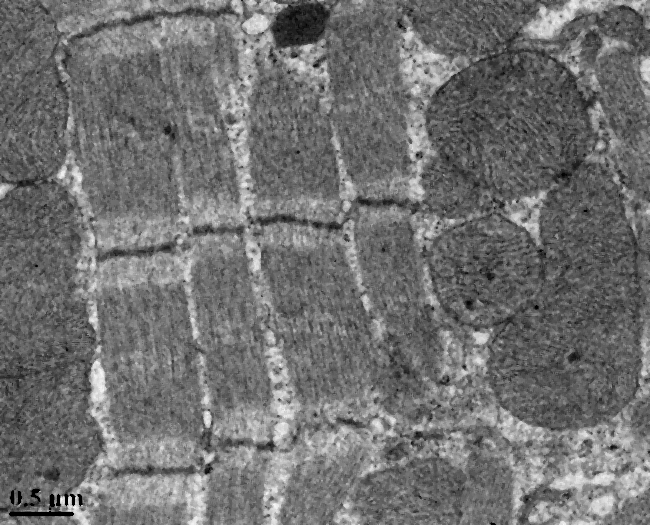

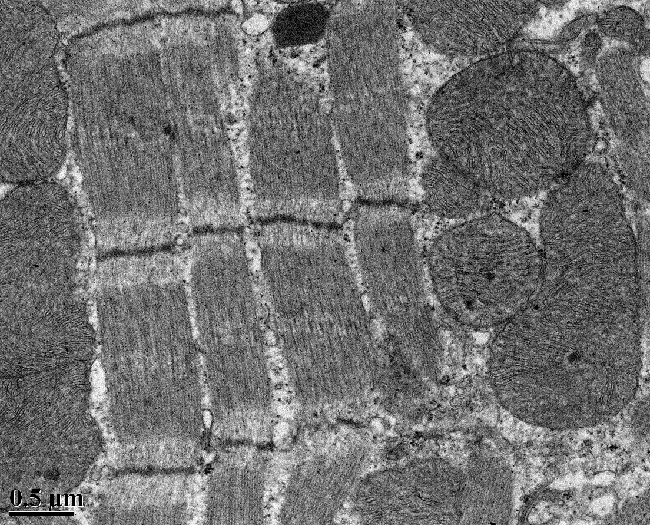

In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np

from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(image_float_array, sigma=3)
display_image(gaussian_img)

median_img = nd.median_filter(image_float_array, size=3)
display_image(median_img)
display_image(image_float_array)


In [ ]:
len(image_float_array) , image_float_array.shape

(525, (525, 650))

In [ ]:
image = np.expand_dims(image_float_array , axis = 2)

In [ ]:
image.shape

(525, 650, 1)

<ipython-input-38-76cc940eaa6c>:1: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(image, multichannel=True))
<ipython-input-38-76cc940eaa6c>:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_nl_means(image, h=1.15 * sigma_est, fast_mode=False,


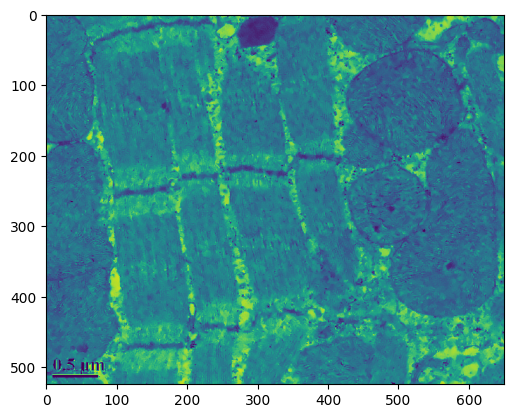

In [ ]:
sigma_est = np.mean(estimate_sigma(image, multichannel=True))

patch_kw = dict(patch_size=5,
                patch_distance=3,
                multichannel=True)

denoise_img = denoise_nl_means(image, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

plt.imshow(denoise_img)

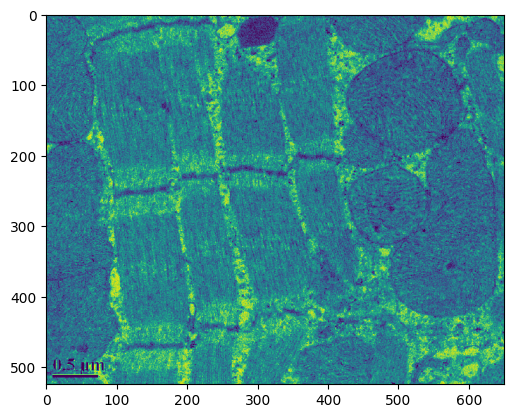

In [ ]:
plt.imshow(image)

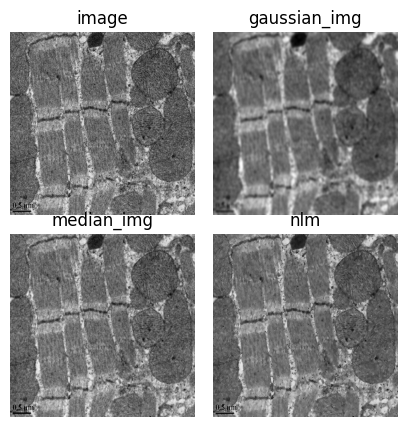

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(5, 5))

# Define image positions
images = [image_float_array , gaussian_img , median_img ,denoise_img]  # Add more images as needed...
titles = ['image' , 'gaussian_img' , 'median_img' ,'nlm']

for i in range(2):
    for j in range(2):
        # Check if there are more images than the grid can accommodate
        if i * 2 + j < len(images):
            axes[i, j].imshow(images[i * 2 + j] , cmap='gray')
            axes[i, j].set_title(titles[i * 2 + j])
            axes[i, j].axis('off')
            axes[i, j].set_aspect('auto')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
